In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import jaccard_score

import missingno as msno

In [2]:
sns.set(style="whitegrid", palette="muted")

In [3]:
data = pd.read_csv("./cervical-cancer.csv")

In [4]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [5]:
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,835.000000,810.000000,828.000000,779.000000,822.000000,822.000000,822.000000,732.000000,732.000000,723.000000,...,71.000000,71.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,2.551852,17.020531,2.304236,0.149635,1.253850,0.465823,0.651639,2.302916,0.114799,...,6.140845,5.816901,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671
std,8.482986,1.676686,2.817000,1.455817,0.356930,4.140727,2.256273,0.476777,3.794180,0.319000,...,5.895024,5.755271,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.isna().sum().sort_values(ascending=False)

STDs: Time since last diagnosis       764
STDs: Time since first diagnosis      764
IUD (years)                           112
IUD                                   112
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
STDs:molluscum contagiosum            100
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:syphilis                         100
STDs:AIDS                             100
STDs:Hepatitis B                      100
STDs:HPV                              100
STDs:HIV                              100
Num of pregnancies                     56
Number of sexual partners              25
Smokes (packs/year)                    13
Smokes (years)                    

Two features are filled mostly with NAs: STDs: Time since first diagnosis and STDs: Time since last diagnosis.<br>
There are many observations with missing values for different kind of STDs, IUD and Contraceptives. <br>
Also information about smoking habits are missing for a few patients. <br>
For now we are removing two columns with  most missing data, maybe later we will add indicator features for modelling.

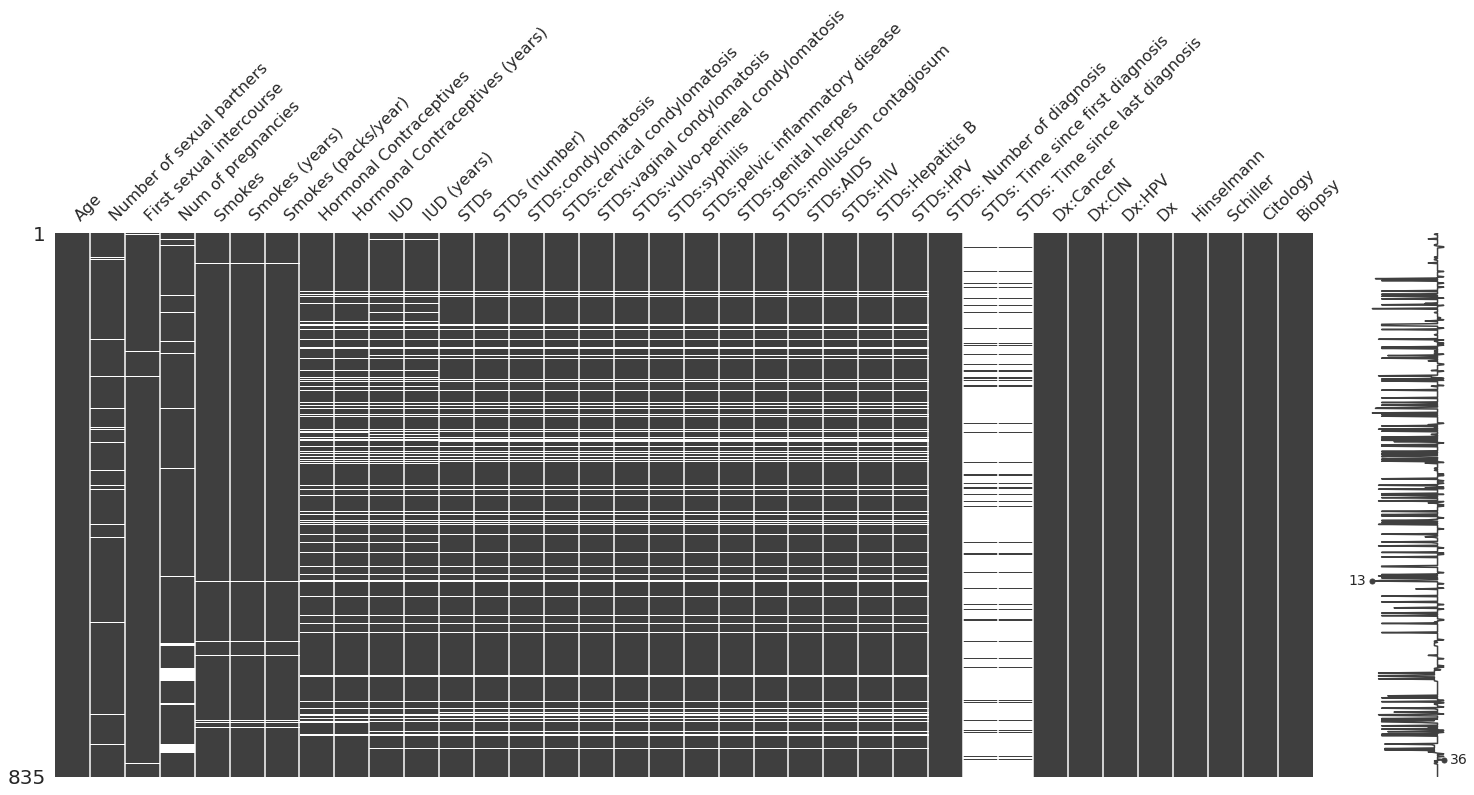

In [7]:
msno.matrix(data)

Two features: STDs:cervical condylomatosis and STDs:AIDS have only one unique value: 0. <br>
For now, removing this uninformative features <br>
Features with 2 unique values are converted to boolean

In [8]:
data.drop(["STDs: Time since first diagnosis", "STDs: Time since last diagnosis"], axis=1, inplace=True)

In [9]:
data.drop(["STDs:cervical condylomatosis", "STDs:AIDS"], axis=1, inplace=True)

In [10]:
for col in data.columns:
    if data[col].nunique() == 2:
        data[col] = data[col].astype("bool")

In [11]:
data.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                   bool
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives                  bool
Hormonal Contraceptives (years)       float64
IUD                                      bool
IUD (years)                           float64
STDs                                     bool
STDs (number)                         float64
STDs:condylomatosis                      bool
STDs:vaginal condylomatosis              bool
STDs:vulvo-perineal condylomatosis       bool
STDs:syphilis                            bool
STDs:pelvic inflammatory disease         bool
STDs:genital herpes                      bool
STDs:molluscum contagiosum               bool
STDs:HIV                                 bool
STDs:Hepatitis B                  

Filling rest of missing data with mode

In [12]:
data = data.fillna(data.mode().iloc[0])

Significant correlation between number of STDs and number of diangonsis and two features regarding smoking habits, may remove later.

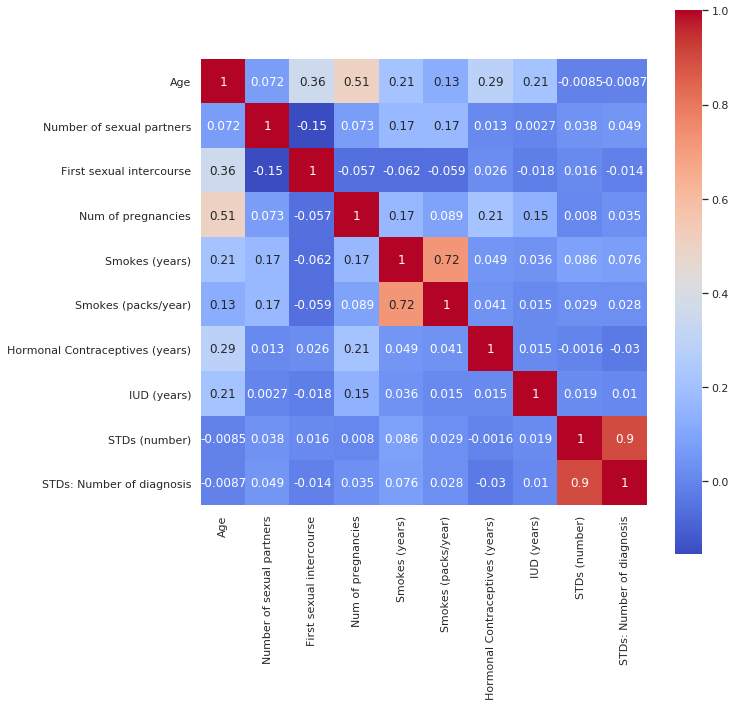

In [13]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.select_dtypes(exclude=['bool']).corr(), annot=True, cmap="coolwarm", square=True)

In [14]:
data_bool = data.select_dtypes(include="bool")

jaccard_matrix = pd.DataFrame(0, index=data_bool.columns, columns=data_bool.columns)


for i in range(len(data_bool.columns)):
    for j in range(len(data_bool.columns)):
        jaccard_matrix.iloc[i, j] = jaccard_score(data_bool.iloc[:, i], data_bool.iloc[:, j])

Since correlation between two binary features can be misleading, here we computed Jaccard score between them <br>
All STDs feature highly overlap, should remove most of them before modeling.

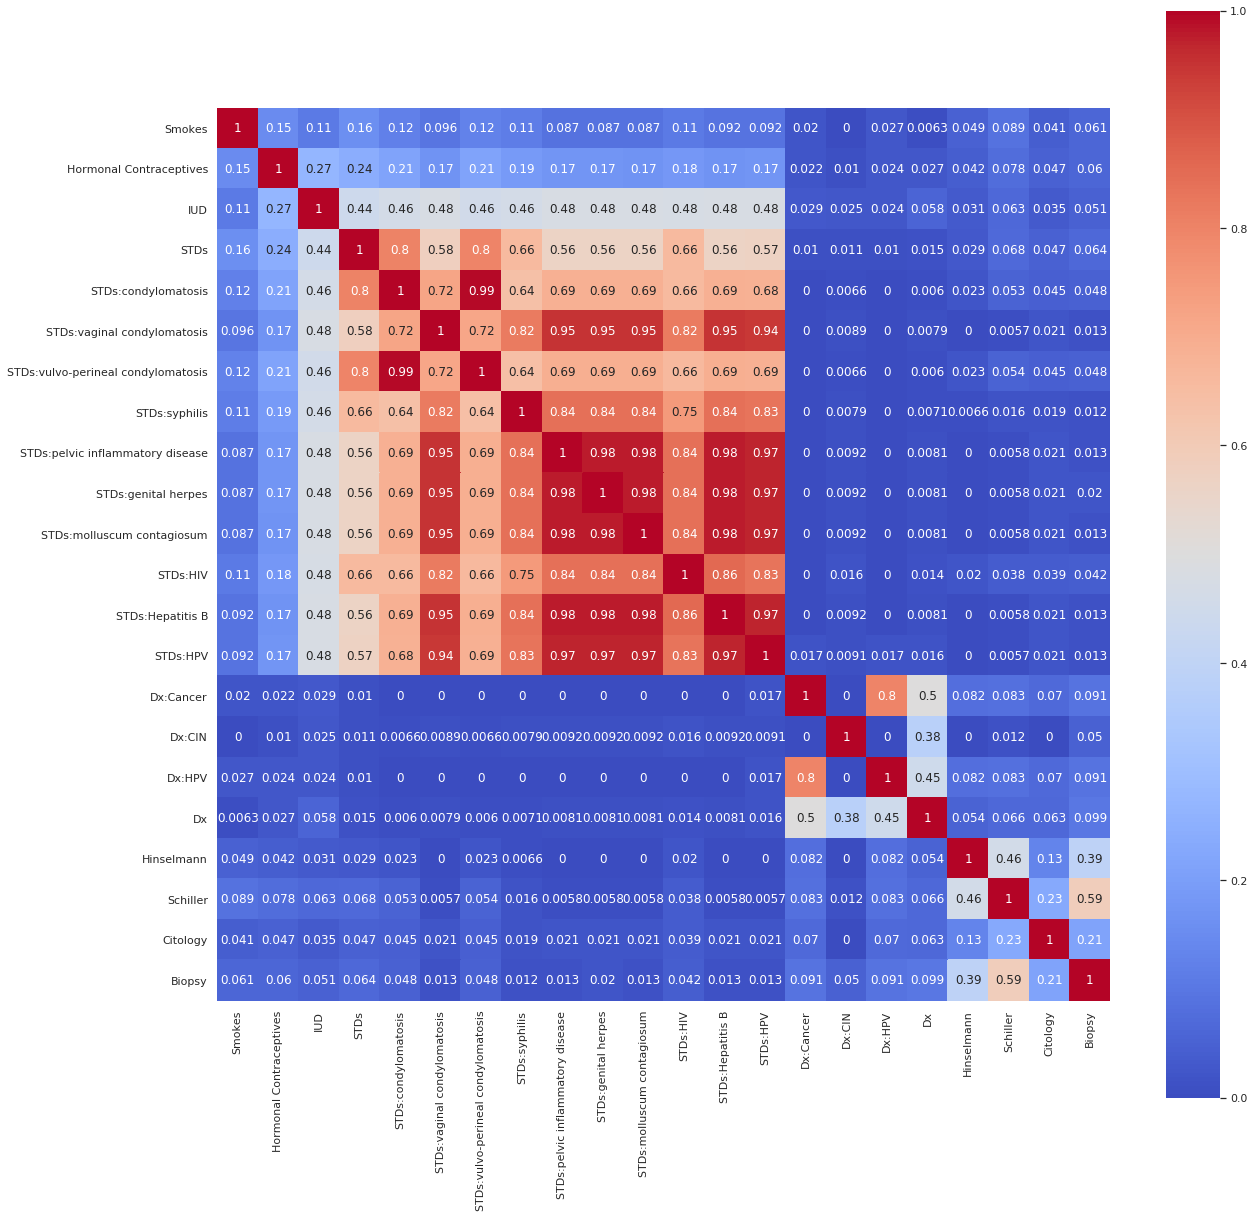

In [15]:
plt.figure(figsize=(20, 20))

sns.heatmap(jaccard_matrix, annot=True, cmap="coolwarm", square=True)

There are 4 target variables: Biopsy, Hinselmann, Schiller and Citology, which represent different ways of diagnosing cervix cancer <br>
    Deciding to drop all but Biopsy for further modelling.

Significant class imbalance, will cause problems during classification

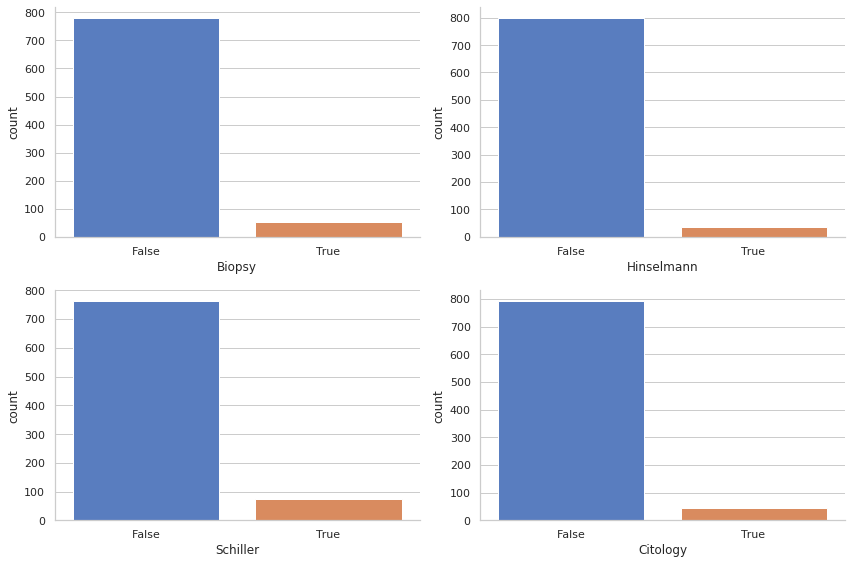

In [16]:
categorical_feat = ['Biopsy', 'Hinselmann', 'Schiller', 'Citology']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for idx, ax in enumerate(axes):
    plt.sca(ax)
    ax = sns.countplot(x = categorical_feat[idx], data=data)
sns.despine()
plt.tight_layout()
plt.show()

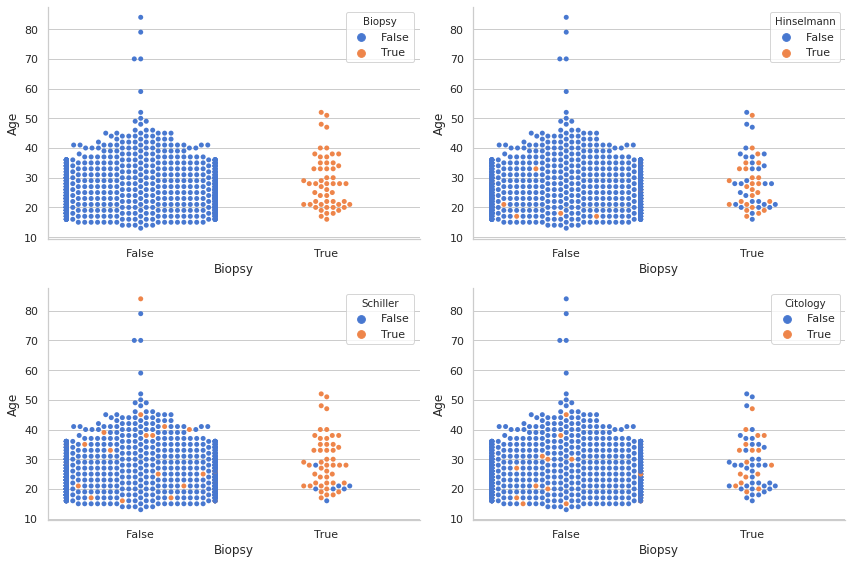

In [17]:
categorical_feat = ['Biopsy', 'Hinselmann', 'Schiller', 'Citology']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for idx, ax in enumerate(axes):
    plt.sca(ax)
    ax = sns.swarmplot(x = "Biopsy", hue = categorical_feat[idx], y = "Age", data=data)
sns.despine()
plt.tight_layout()
plt.show()

In [18]:
data.drop(["Hinselmann", "Schiller", "Citology"], axis=1, inplace=True)